# K-12 Education Analytics

## Introduction
This project analyzes a dataset of student performance and demographics to provide insights into student achievement, attendance, and demographics. The aim is to uncover trends and correlations that can inform educational strategies and interventions.

## Business Questions
1. What are the demographic characteristics of the student population?
2. How does attendance vary among different demographics?
3. What are the trends in student performance across different subjects?
4. Are there any correlations between student demographics and performance?

## Data Loading
```python
import pandas as pd

In [2]:
import pandas as pd

In [19]:
# Load the dataset
file_path = 'sample_k12_data.csv'
data = pd.read_csv(file_path)

In [20]:
# Display basic information about the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_ID     10000 non-null  object 
 1   Gender         10000 non-null  object 
 2   DOB            10000 non-null  object 
 3   Grade          10000 non-null  int64  
 4   Attendance     10000 non-null  float64
 5   Math_Score     10000 non-null  float64
 6   Reading_Score  10000 non-null  float64
 7   Science_Score  10000 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 625.1+ KB
None
                             Student_ID  Gender         DOB  Grade  \
0  986424d5-6f43-422e-8cdd-9a2636baefe2    Male  2016-02-17      5   
1  db33c6ff-c6f1-4a23-a42d-c53e6d22fde5  Female  2008-10-06      4   
2  033a9667-3942-4dec-a6b1-af6c997eb319  Female  2016-06-08      3   
3  2e337d02-bf06-4ad6-b617-a13b0e3f9358  Female  2007-02-28      8   
4  2e964f25-dc9f-4424-9213-e472df4

# Data Cleaning

In [21]:
# Data Cleaning
data.drop_duplicates(inplace=True)
data.fillna(method='ffill', inplace=True)
data['DOB'] = pd.to_datetime(data['DOB'])

In [22]:
# Calculate age
data['Age'] = (pd.to_datetime('today') - data['DOB']).dt.days // 365


In [23]:

data.head()

,Student_ID,Gender,DOB,Grade,Attendance,Math_Score,Reading_Score,Science_Score,Age
0,986424d5-6f43-422e-8cdd-9a2636baefe2,Male,2016-02-17,5,93.2,81.9,64.9,92.4,8
1,db33c6ff-c6f1-4a23-a42d-c53e6d22fde5,Female,2008-10-06,4,79.6,73.0,54.7,74.7,15
2,033a9667-3942-4dec-a6b1-af6c997eb319,Female,2016-06-08,3,83.7,98.2,56.3,59.8,7
3,2e337d02-bf06-4ad6-b617-a13b0e3f9358,Female,2007-02-28,8,91.6,60.9,59.0,86.8,17
4,2e964f25-dc9f-4424-9213-e472df411567,Male,2012-04-25,6,87.1,79.4,60.2,70.9,12


# Exploratory Data Analysis (EDA)

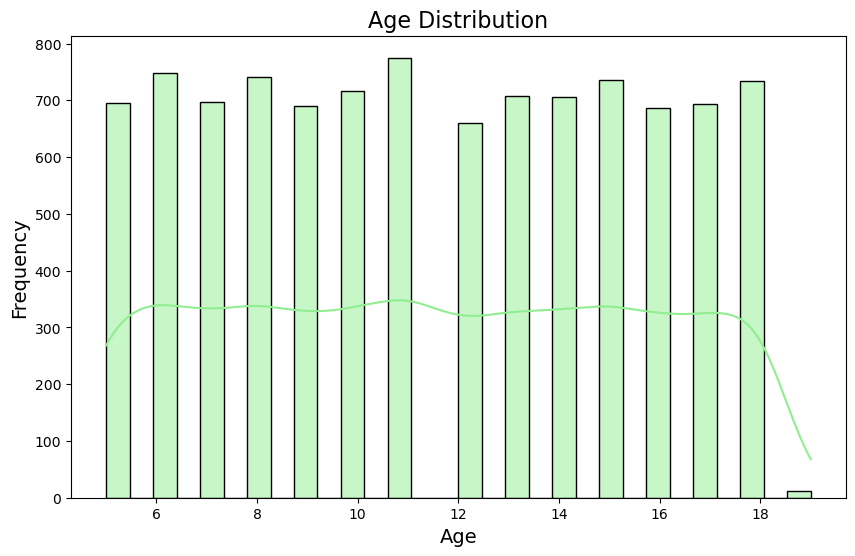

In [31]:
# Age Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette
sns.set_palette("husl")

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30, color='lightgreen')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig('K12_Education_Analytics/age_distribution.png')
plt.show()

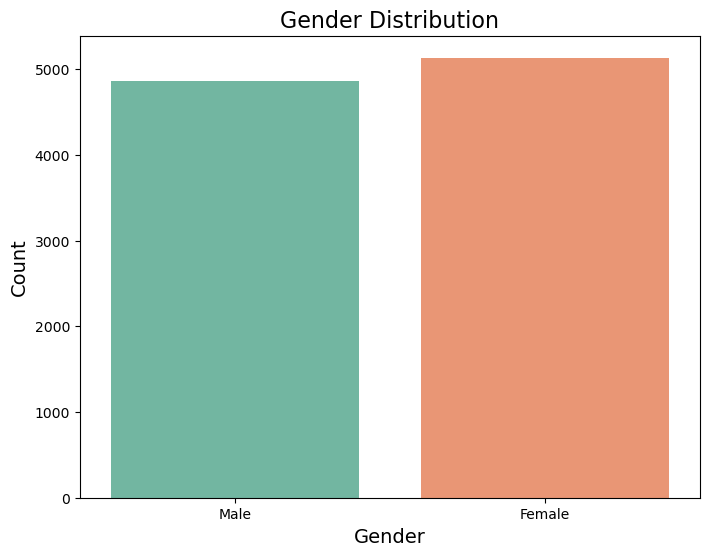

In [32]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='Set2')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.savefig('K12_Education_Analytics/gender_distribution.png')
plt.show()

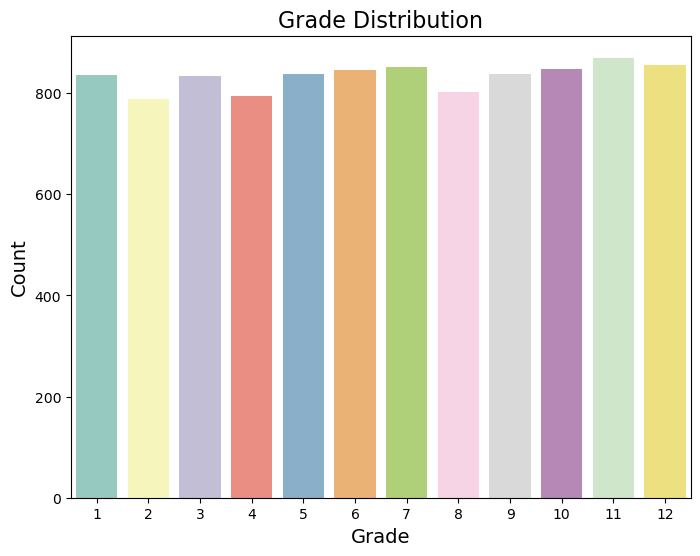

In [33]:
# Grade Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Grade', data=data, palette='Set3')
plt.title('Grade Distribution', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.savefig('K12_Education_Analytics/grade_distribution.png')
plt.show()


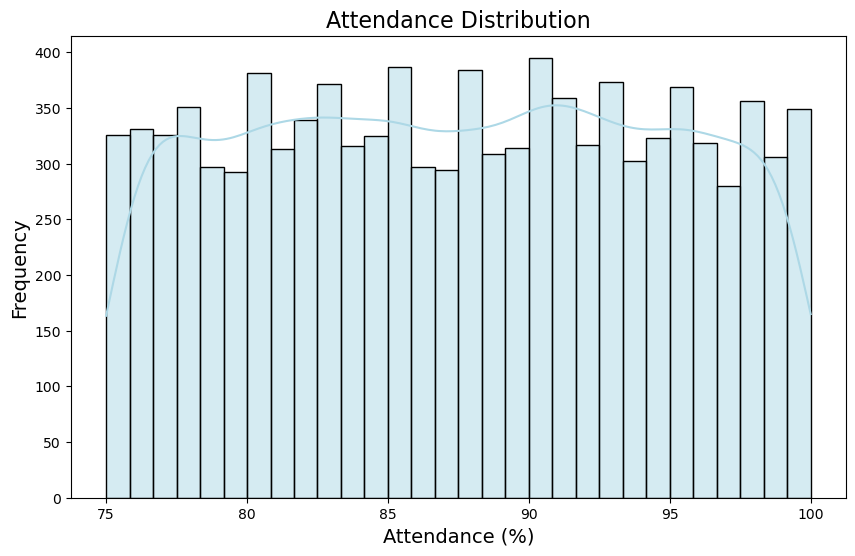

In [40]:
# Attendance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Attendance'], kde=True, bins=30, color='lightblue')
plt.title('Attendance Distribution', fontsize=16)
plt.xlabel('Attendance (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig('K12_Education_Analytics/attendance_distribution.png')
plt.show()


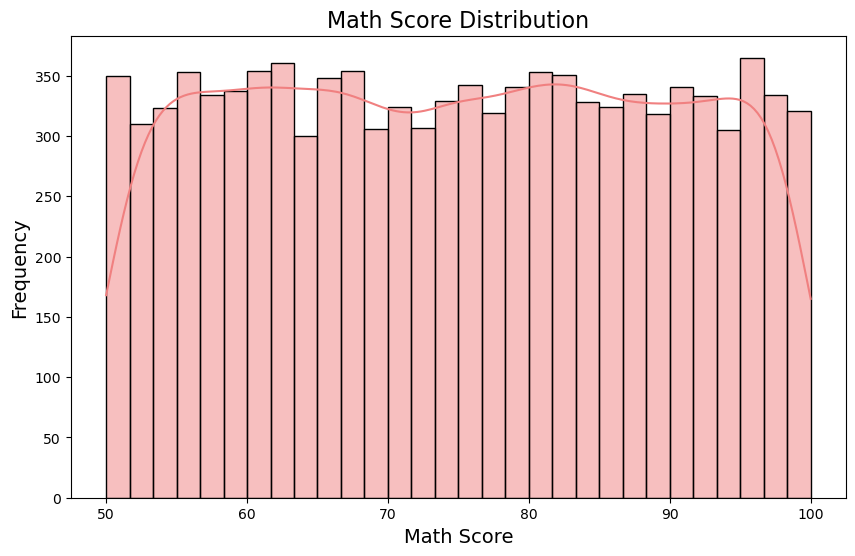

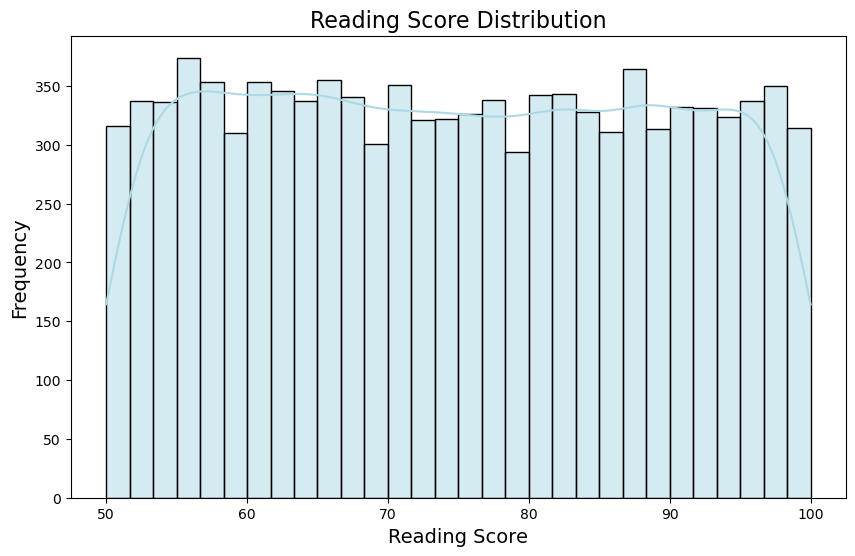

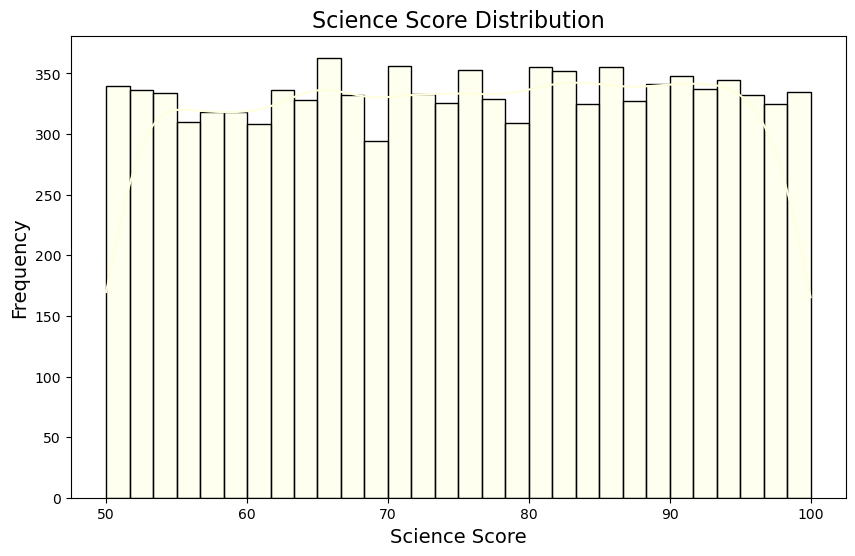

In [41]:
# Subject Score Distributions
# Math Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Math_Score'], kde=True, bins=30, color='lightcoral')
plt.title('Math Score Distribution', fontsize=16)
plt.xlabel('Math Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig('K12_Education_Analytics/math_score_distribution.png')
plt.show()

# Reading Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Reading_Score'], kde=True, bins=30, color='lightblue')
plt.title('Reading Score Distribution', fontsize=16)
plt.xlabel('Reading Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig('K12_Education_Analytics/reading_score_distribution.png')
plt.show()

# Science Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Science_Score'], kde=True, bins=30, color='lightyellow')
plt.title('Science Score Distribution', fontsize=16)
plt.xlabel('Science Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig('K12_Education_Analytics/science_score_distribution.png')
plt.show()


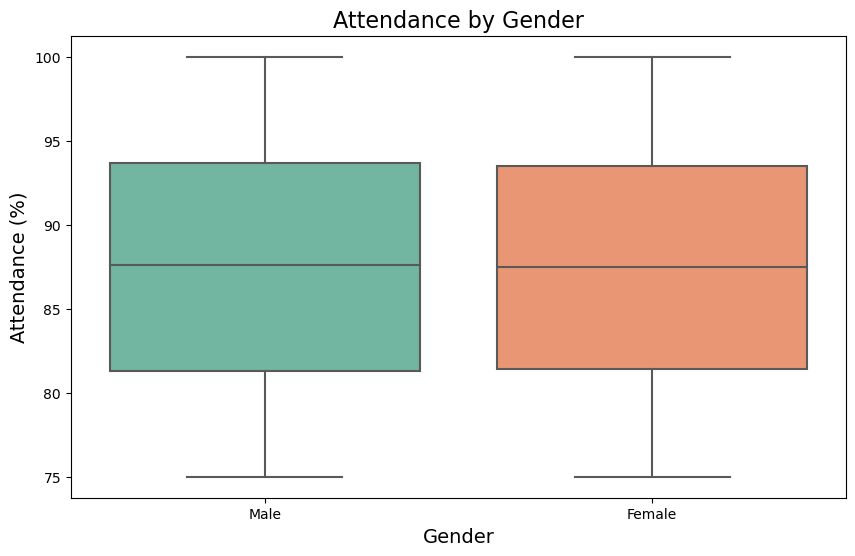

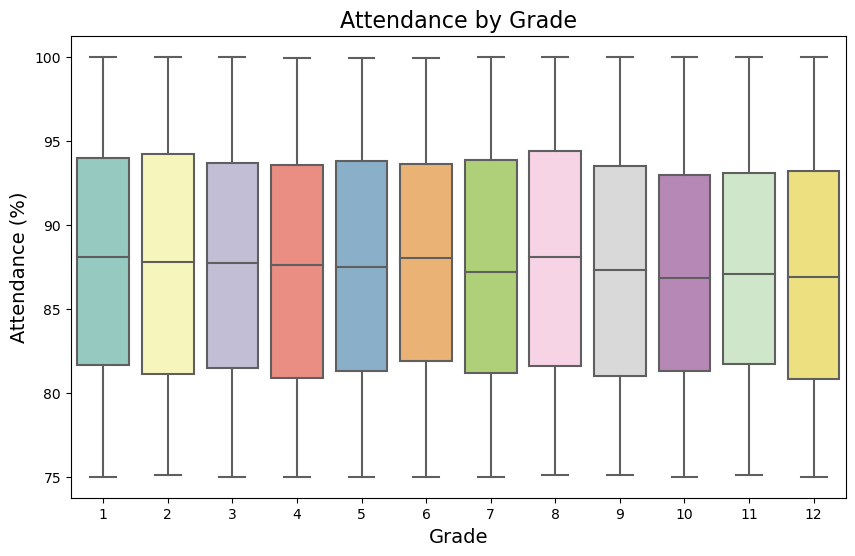

In [42]:
# Attendance by Demographics
# Attendance by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Attendance', data=data, palette='Set2')
plt.title('Attendance by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Attendance (%)', fontsize=14)
plt.savefig('K12_Education_Analytics/attendance_by_gender.png')
plt.show()

# Attendance by Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Attendance', data=data, palette='Set3')
plt.title('Attendance by Grade', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Attendance (%)', fontsize=14)
plt.savefig('K12_Education_Analytics/attendance_by_grade.png')
plt.show()


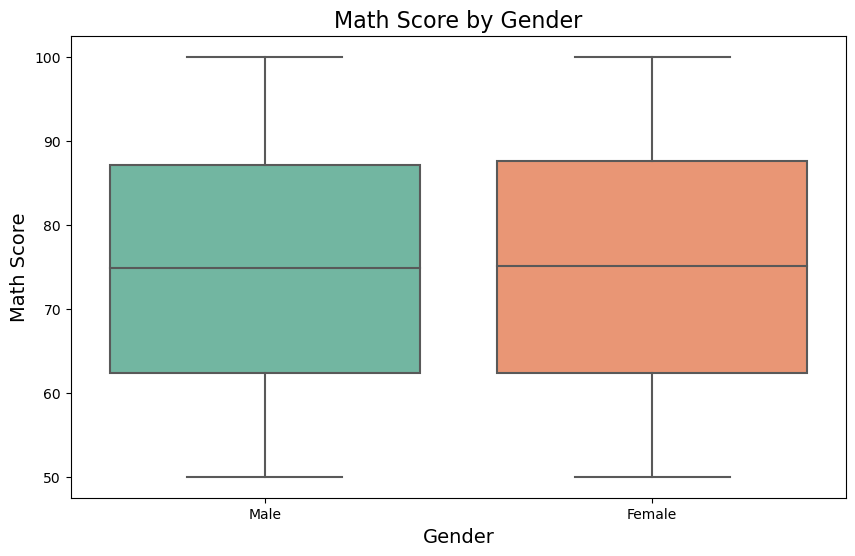

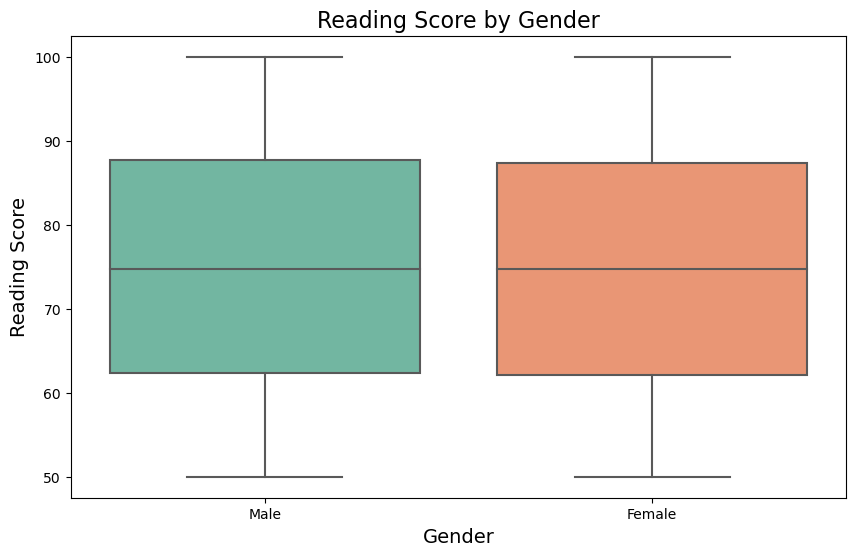

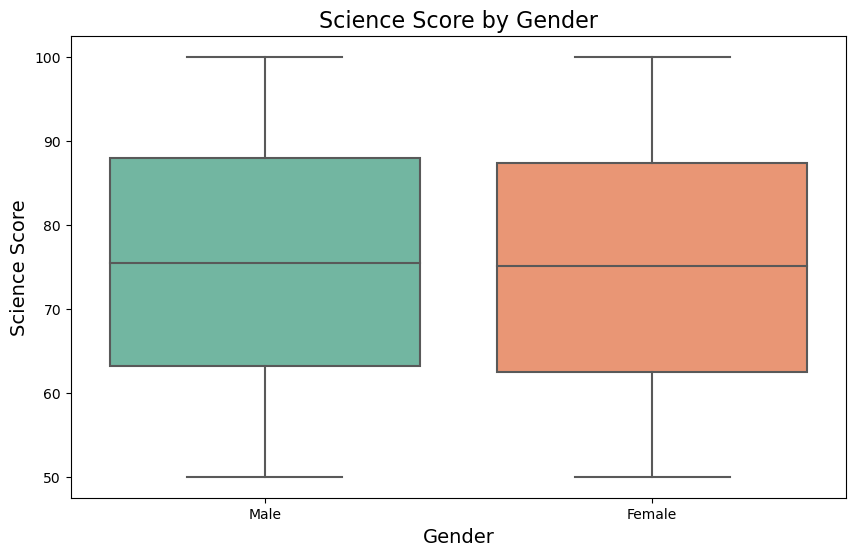

In [43]:
# Performance by Demographics
# Performance by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Math_Score', data=data, palette='Set2')
plt.title('Math Score by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Math Score', fontsize=14)
plt.savefig('K12_Education_Analytics/math_score_by_gender.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Reading_Score', data=data, palette='Set2')
plt.title('Reading Score by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Reading Score', fontsize=14)
plt.savefig('K12_Education_Analytics/reading_score_by_gender.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Science_Score', data=data, palette='Set2')
plt.title('Science Score by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Science Score', fontsize=14)
plt.savefig('K12_Education_Analytics/science_score_by_gender.png')
plt.show()


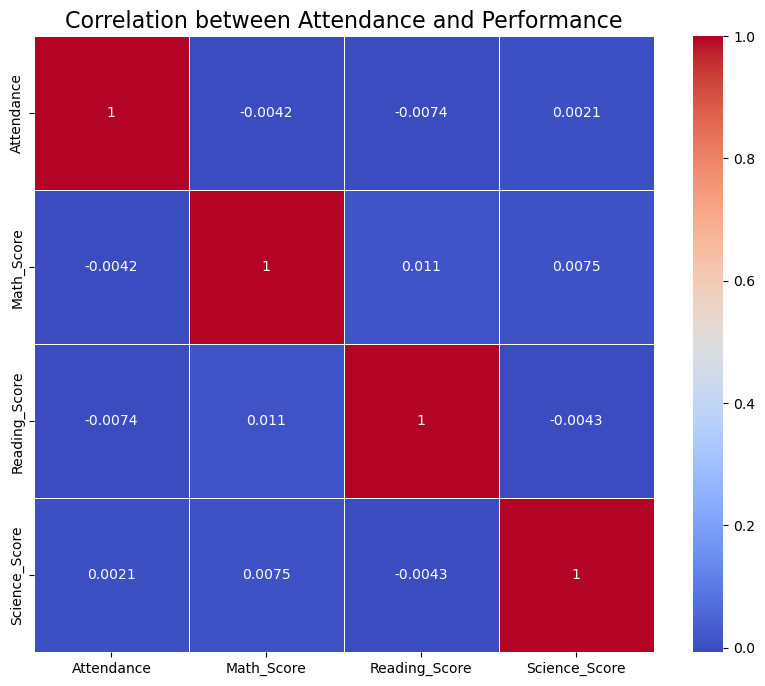

In [44]:
# Correlation Analysis
# Correlation between Attendance and Performance
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Attendance', 'Math_Score', 'Reading_Score', 'Science_Score']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Attendance and Performance', fontsize=16)
plt.savefig('K12_Education_Analytics/correlation_attendance_performance.png')
plt.show()
